![header%20ipynb.png](attachment:header%20ipynb.png)

# Hands-On
---

Hands-On ini digunakan pada kegiatan Microcredential Associate Data Scientist 2021

# Tugas Mandiri Pertemuan 14
---
Pertemuan 14 (empatbelas) pada Microcredential Associate Data Scientist 2021 menyampaikan materi mengenai Membangun Model (RNN dan LSTM). silakan Anda kerjakan Latihan 1 s/d 5. Output yang anda lihat merupakan panduan yang dapat Anda ikuti dalam penulisan code :)

# RNN

Jaringan saraf berulang atau recurrent neural network (RNN) adalah jenis arsitektur jaringan saraf tiruan yang pemrosesannya dipanggil berulang-ulang untuk memroses masukan yang biasanya adalah data sekuensial. RNN masuk dalam kategori deep learning karena data diproses melalui banyak lapis (layer). RNN telah mengalami kemajuan yang pesat dan telah merevolusi bidang-bidang seperti pemrosesan bahasa alami (NLP), pengenalan suara, sintesa musik, pemrosesan data finansial seri waktu, analisa deret DNA, analisa video, dan sebagainya.


RNN memroses input secara sekuensial, sampel per sampel. Dalam tiap pemrosesan, output yang dihasilkan tidak hanya merupakan fungsi dari sampel itu saja, tapi juga berdasarkan state internal yang merupakan hasil dari pemrosesan sampel-sampel sebelumnya (atau setelahnya, pada bidirectional RNN).

Berikut adalah ilustrasi bagaimana RNN bekerja. Misalnya kita membuat RNN untuk menerjemahkan bahasa Indonesia ke bahasa Inggris

![image.png](attachment:image.png)

Ilustrasi di atas kelihatan rumit, tapi sebenarnya cukup mudah dipahami.

* sumbu horizontal adalah waktu, direpresentasikan dengan simbol t. Dapat kita bayangkan pemrosesan berjalan dari kiri ke kanan. Selanjutnya kita sebut t adalah langkah waktu (time step).

* Keseluruhan input adalah kalimat, dalam hal ini:
        Budi pergi ke sekolah.

* Pemrosean input oleh RNN adalah kata demi kata. Input kata-kata ini disimbolkan dengan x1 ,x2 , … ,x5 , atau secara umum xt.

* Output adalah kalimat, dalam hal ini:
        Budi goes to school.
 
* RNN memberikan output kata demi kata, dan ini kita simbolkan dengan ŷ1, ŷ2,  …, ŷ5 , atau secara umum ŷt .
* Dalam tiap pemrosesan, RNN akan menyimpan state internal yaitu st, yang  diberikan dari satu langkah waktu ke langkah waktu berikutnya. Inilah “memori” dari RNN.

Dengan contoh di atas, kita bisa generalisasikan arsitektur RNN sebagai berikut:

![image-2.png](attachment:image-2.png)

Tambahan yang tidak terdapat di diagram sebelumnya adalah U, V, dan W, yang merupakan parameter-parameter yang dimiliki RNN. Kita akan bahas pemakaian parameter-parameter ini nanti.

Penting untuk dipahami bahwa walaupun ada empat kotak RNN di gambar di atas, empat kotak itu mencerminkan satu modul RNN yang sama (satu instans model dengan parameter-parameter U, V, dan W yang sama). Penggambaran di atas hanya agar aspek sekuensialnya lebih tergambar.

Alternatif representasinya adalah seperti ini, agar lebih jelas bahwa hanya ada satu modul RNN:
![image-3.png](attachment:image-3.png)

Inilah sebabnya kenapa arsitektur ini disebut RNN. Kata recurrent (berulang) dalam RNN timbul karena RNN melakukan perhitungan yang sama secara berulang-ulang atas input yang kita berikan.

Sering juga kedua ilustrasi di atas digabungkan jadi satu sbb:
![image-4.png](attachment:image-4.png)
Sesuai dengan gambar di atas, ilustrasi di sebelah kanan adalah penjabaran (unrolled) dari versi berulang di sebelah kiri.

# Latihan (1)

### Melakukan import library yang dibutuhkan

In [3]:
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

# import library for build model 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# import library untuk data preprocessing
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD

import math

import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Dataset

In [69]:
#Panggil file (load file bernama Stock.csv) dan simpan dalam dataframe
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ASC DATA  SCIENCE - RISTEK DIKTI/14_Tugas-Mandiri_Pertemuan-14/Stock.csv")


In [70]:
#Mengecek missing value
data.isnull().sum()

Date      0
Open      1
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [71]:
# creating bool series True for NaN values 
locate_missing_values = pd.isnull(data["Open"]) 
    
# filtering data 
# displaying data only with Gender = NaN 
data[locate_missing_values] 

,Date,Open,High,Low,Close,Volume,Name
2913,2017-07-31,NaN,119.34,118.44,118.57,2172327,UTX


In [72]:
data = data.drop([data.index[2913]])
data.shape

(3019, 7)

In [73]:
# tampilkan 5 baris data 
data.head(5)

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,56.45,56.66,55.46,56.53,3716500,UTX
1,2006-01-04,56.80,56.80,55.84,56.19,3114500,UTX
2,2006-01-05,56.30,56.49,55.63,55.98,3118900,UTX
3,2006-01-06,56.45,56.67,56.10,56.16,2874300,UTX
4,2006-01-09,56.37,56.90,56.16,56.80,2467200,UTX


### Review Data

In [17]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 188.7+ KB


# Latihan (2)

###  Data Preprocessing

In [74]:
# 498 hari terakhir akan digunakan dalam pengujian
# 2500 hari pertama akan digunakan dalam pelatihan

dataset_train = data.iloc[:2500,:]
dataset_test = data.iloc[-498:,:]

In [75]:
training_set = dataset_train.loc[:,['Low']].values

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(training_set)

dataset_train_scaled.shape

(2500, 1)

In [77]:
X_train = []
y_train = []

# definisikan variabel step dan train 

time_step = 21

# membuat fitur dan lists label

for i in range(time_step, 2500):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [78]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (2479, 21)
Shape of y_train before reshape : (2479,)


In [79]:
#Reshape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (2479, 21, 1)
Shape of y_train after reshape : (2479, 1)


Sekarang kita bisa mulai membuat model kita, dimulai dengan RNN

# Latihan (3)

###  Build Model - RNN

In [80]:
#Creating RNN Model

# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [81]:
# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.15)
             )

# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.15)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.15)
             )


# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.15)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 20, batch_size = 25)

Epoch 1/20
100/100 [==============================] - 5s 22ms/step - loss: 0.2307 - accuracy: 8.0678e-04
Epoch 2/20
100/100 [==============================] - 2s 21ms/step - loss: 0.0983 - accuracy: 8.0678e-04
Epoch 3/20
100/100 [==============================] - 2s 19ms/step - loss: 0.0540 - accuracy: 8.0678e-04
Epoch 4/20
100/100 [==============================] - 2s 19ms/step - loss: 0.0422 - accuracy: 8.0678e-04
Epoch 5/20
100/100 [==============================] - 2s 19ms/step - loss: 0.0279 - accuracy: 8.0678e-04
Epoch 6/20
100/100 [==============================] - 2s 20ms/step - loss: 0.0236 - accuracy: 8.0678e-04
Epoch 7/20
100/100 [==============================] - 2s 20ms/step - loss: 0.0196 - accuracy: 8.0678e-04
Epoch 8/20
100/100 [==============================] - 2s 19ms/step - loss: 0.0169 - accuracy: 8.0678e-04
Epoch 9/20
100/100 [==============================] - 2s 19ms/step - loss: 0.0145 - accuracy: 8.0678e-04
Epoch 10/20
100/100 [==============================] - 

In [87]:
#Prediksi Model RNN
rnn_predictions = regressor.predict(X_train)  # predictions
rnn_predictions = scaler.inverse_transform(rnn_predictions) # scaling back from 0-1 to original
rnn_predictions.shape

(2479, 1)

In [83]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(2479, 1)

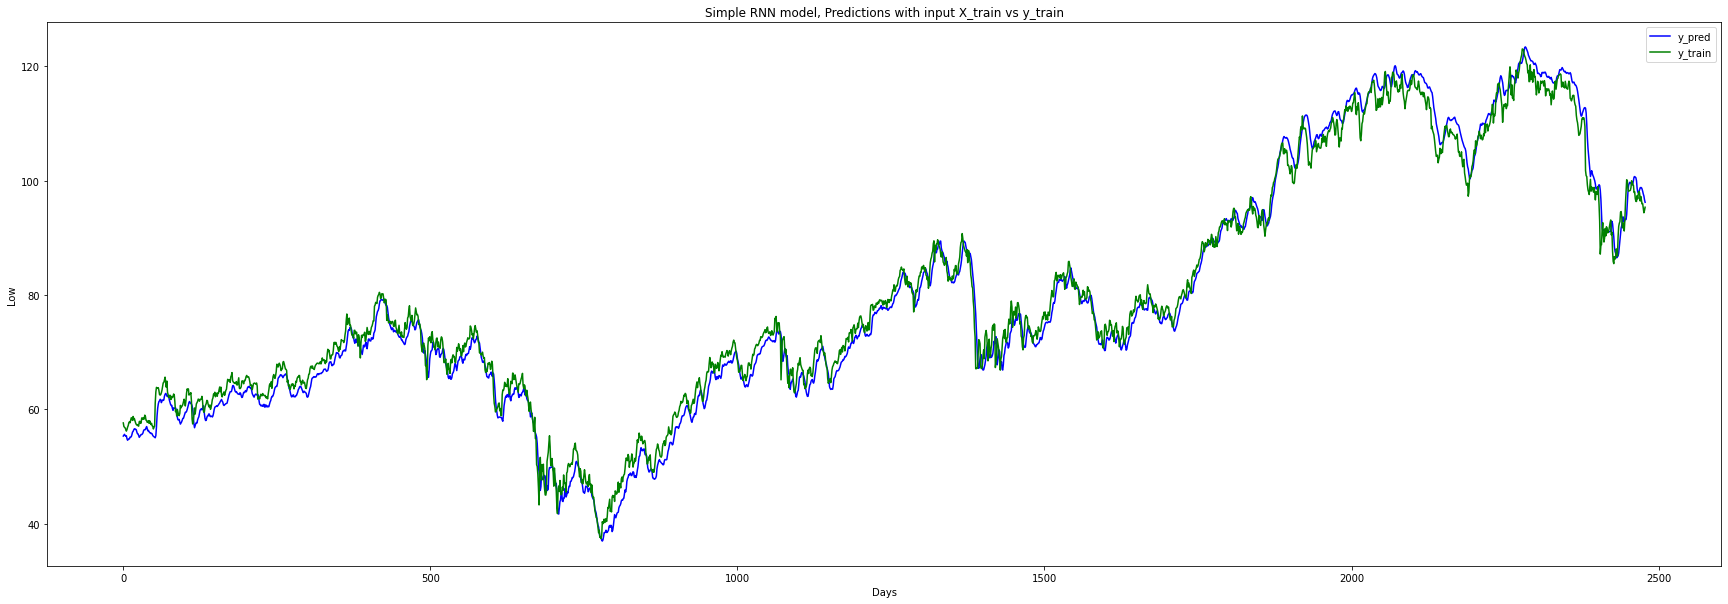

In [88]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(rnn_predictions, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Low")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [89]:
# evaluating using R squared
from sklearn.metrics import r2_score
RNN_score = r2_score(y_train, rnn_predictions) 
 
print(RNN_score)

0.9853797921523689


# Latihan (4)

###  Build Model - LSTM

In [31]:
#Creating Test Dataset from Validation Data

dataset_validation = dataset_test.Low.values  # getting "Low" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling Low values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (498, 1)


In [33]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, 498):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [34]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [35]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (477, 21)
Shape of y_test before reshape : (477,)


In [36]:
#Reshape

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [37]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (477, 21, 1)
Shape of y_test after reshape : (477, 1)


In [38]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

Shape of y_pred_of_test : (477, 1)


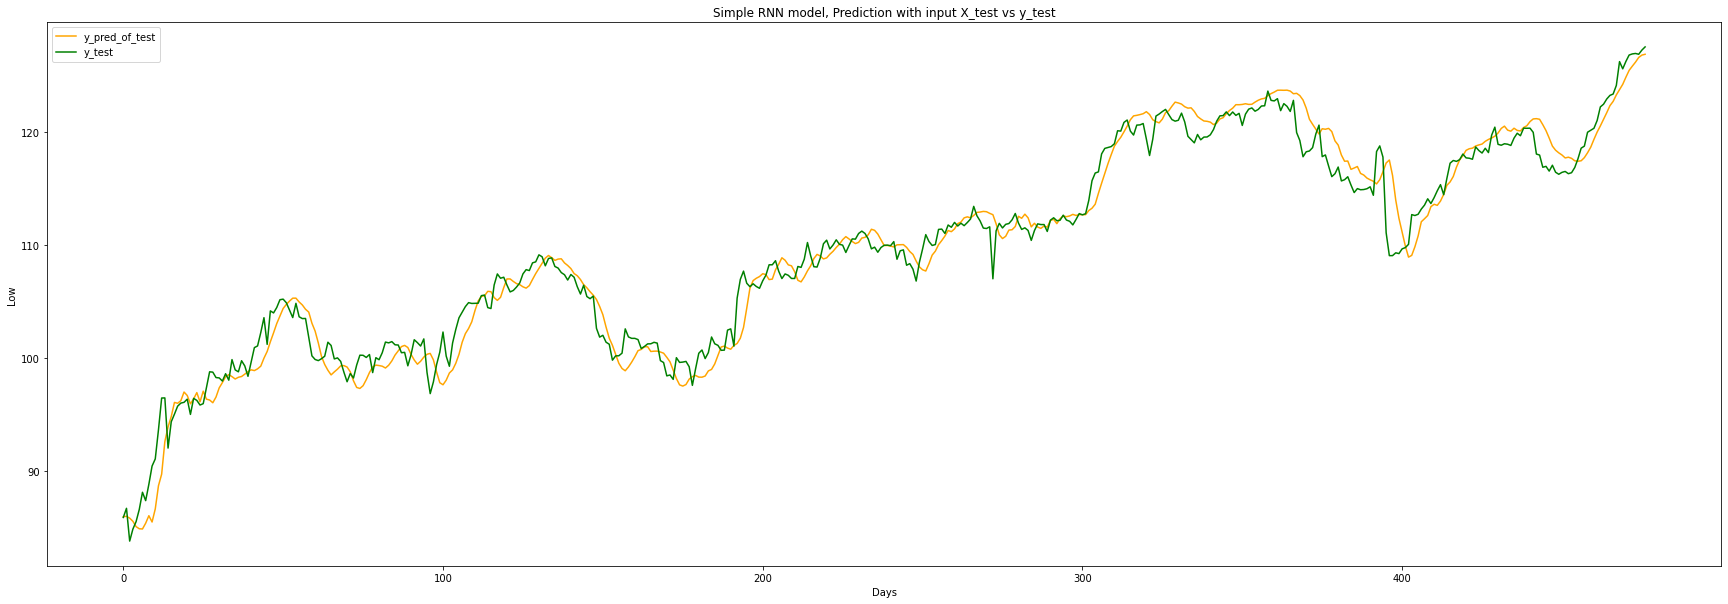

In [40]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Low")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

**Building LTSM Model**

In [46]:
y_train = scaler.fit_transform(y_train)

In [65]:
from keras.layers import LSTM

# buat varibel penampung model LSTM
model_lstm = Sequential()

#Add a LSTM layer with 40 internal units. dengan Dropout sebesar 0.15
model_lstm.add(LSTM(40,return_sequences=True,input_shape = (X_train.shape[1],1))) #40 lstm neuron block
model_lstm.add(Dropout(0.15)) 

model_lstm.add(LSTM(40, return_sequences= False))
model_lstm.add(Dropout(0.15))
model_lstm.add(Dense(32))

# Add a Dense layer with 1 units.
model_lstm.add(Dense(1))

# menambahkan loss function kedalam model lstm dengan tipe MSE
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])

# fit lstm model, dengan epoch 20 dan batch size 25
history2 = model_lstm.fit(X_train, y_train, epochs = 20, batch_size = 25)

Epoch 1/20
100/100 [==============================] - 5s 20ms/step - loss: 0.0155 - accuracy: 8.0678e-04
Epoch 2/20
100/100 [==============================] - 2s 20ms/step - loss: 0.0029 - accuracy: 8.0678e-04
Epoch 3/20
100/100 [==============================] - 2s 20ms/step - loss: 0.0024 - accuracy: 8.0678e-04
Epoch 4/20
100/100 [==============================] - 2s 20ms/step - loss: 0.0022 - accuracy: 8.0678e-04
Epoch 5/20
100/100 [==============================] - 2s 19ms/step - loss: 0.0022 - accuracy: 8.0678e-04
Epoch 6/20
100/100 [==============================] - 2s 20ms/step - loss: 0.0019 - accuracy: 8.0678e-04
Epoch 7/20
100/100 [==============================] - 2s 21ms/step - loss: 0.0016 - accuracy: 8.0678e-04
Epoch 8/20
100/100 [==============================] - 2s 20ms/step - loss: 0.0015 - accuracy: 8.0678e-04
Epoch 9/20
100/100 [==============================] - 2s 21ms/step - loss: 0.0015 - accuracy: 8.0678e-04
Epoch 10/20
100/100 [==============================] - 

**Prediksi Model LTSM**

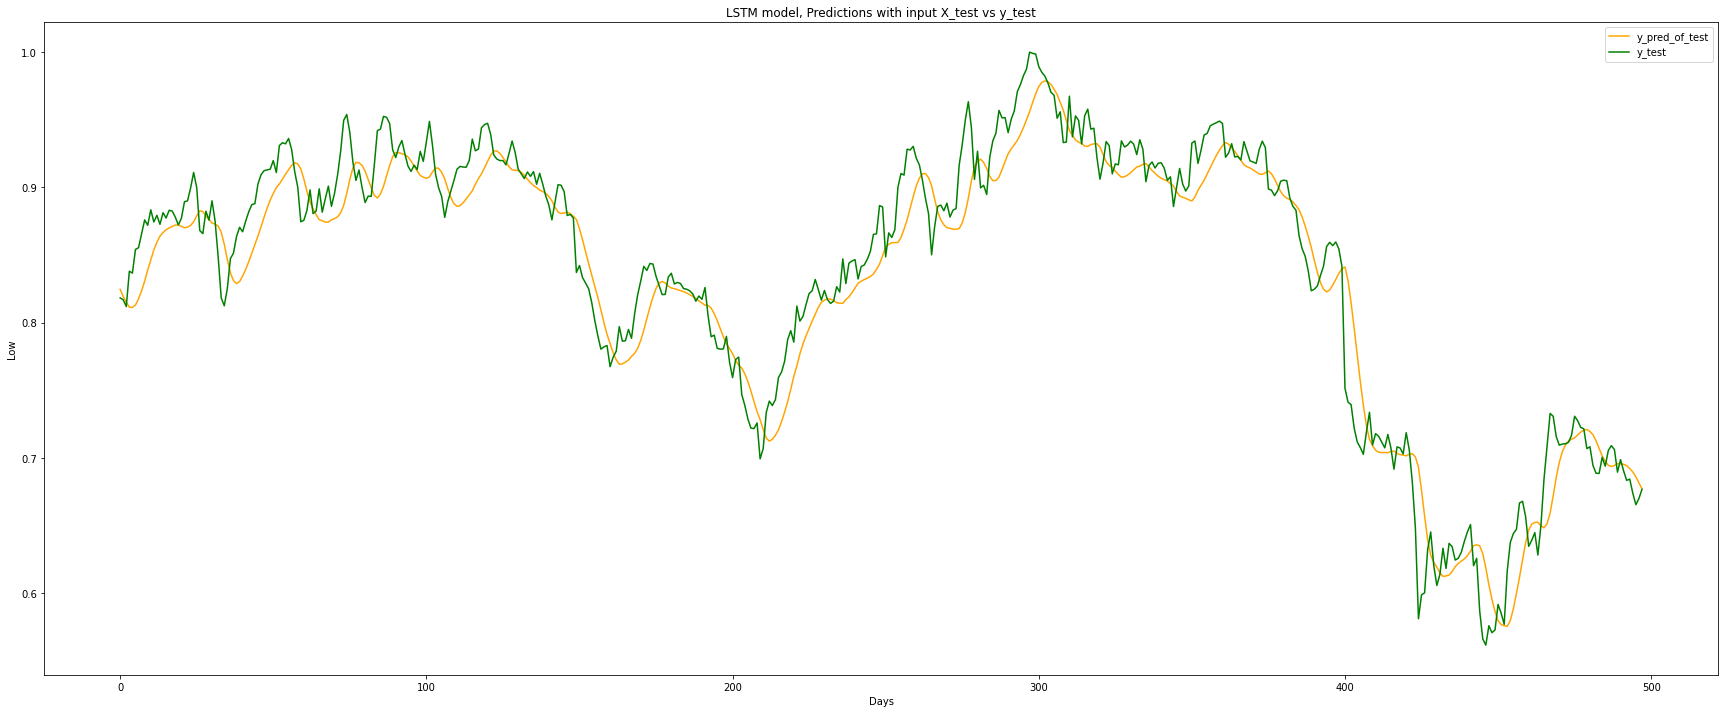

In [66]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Low")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [67]:
#r2 score for the values predicted by the above trained LSTM model
lstm_predictions = model_lstm.predict(X_test)

lstm_score = r2_score(y_test, lstm_predictions)
print("R^2 Score of LSTM model = ",lstm_score)

R^2 Score of LSTM model =  0.934876305123868


# Latihan (5)

### Evaluation

In [86]:
# Cetak nilai prediksi masing-masing model dengan menggunakan r^2 square

print("R^2 dari Model RNN", RNN_score)
print("R^2 dari Model LTSM", lstm_score)


R^2 dari Model RNN 0.9853797921523689
R^2 dari Model LTSM 0.934876305123868


### Visualisasi Perbandingan Hasil Model prediksi dengan data original 

In [97]:
lstm_predictions = scaler.inverse_transform(lstm_predictions)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
test_y = scaler.inverse_transform(y_test.reshape(-1,1))


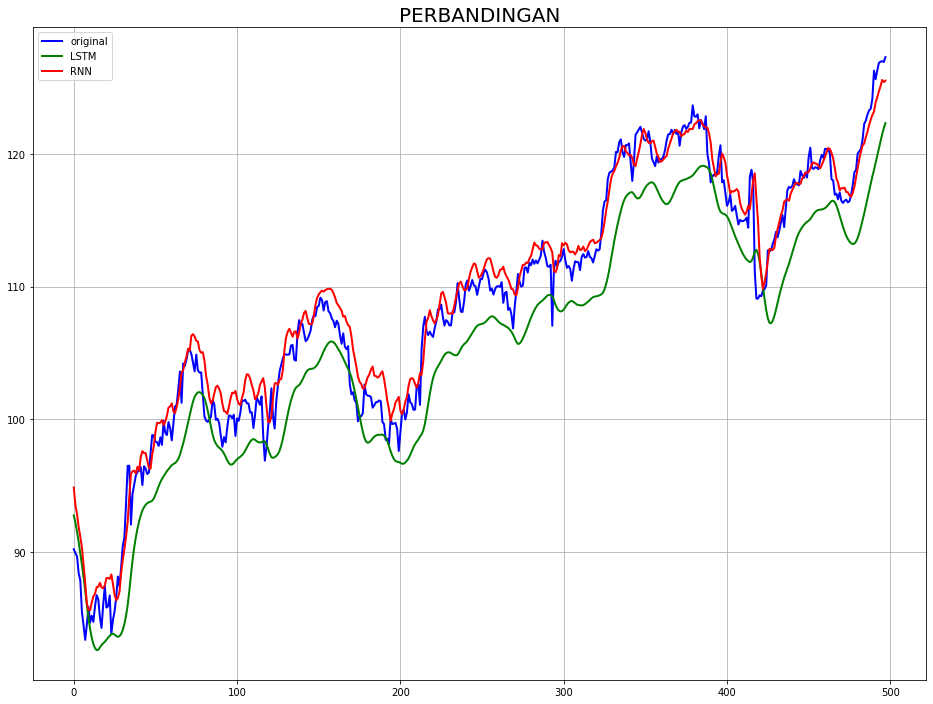

In [ ]:
plt.figure(figsize=(16,12))

plt.plot(test_y, c="blue",linewidth=2, label="original")
plt.plot(lstm_predictions, c="green",linewidth=2, label="LSTM")
plt.plot(rnn_predictions, c="red",linewidth=2, label="RNN")
plt.legend()
plt.title("PERBANDINGAN",fontsize=20)
plt.grid()
plt.show()

## Berikan Kesimpulan Anda!

In [ ]:
# Dilihat dari R-squared
R^2 dari Model RNN 0.9853797921523689
R^2 dari Model LTSM 0.934876305123868

Menggunakan data stock, tingkat akurasi prediksi dari RNN  lebih tinggi dari LTSM